In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
def principalComponents(train):
    
    W, V = LA.eig(np.matmul(np.array(A),np.array(A.T)))
    
    for i in range(len(W)):
        W[i] = abs(W[i])**0.5
    
    K = sorted(W ,reverse = True)
    return W, V, K


def plotPrincipalComponents(train ,sortedPrincipalComponents, n):
    
    X_axis = range(1,len(train)+1)
    
    plt.bar(X_axis[:n],sortedPrincipalComponents[:n])
    plt.xlabel("Sr. no. of singular value")
    plt.ylabel("Principal Singular value")
    plt.title("First 50 Principal Components")
    plt.show()
    
    
def reduced_train_test_data(A,Z,W,V,K,l):        # A is train dataset
                                                 # Z is test dataset
                                                 # W is eigenvalues of A
                                                 # V is eigenvectors
                                                 # K is sorted eigenvalues
                                                 # l is the required dimension of each data point
    
    #Principal Components
    W = list(W)
    s = []
    
    
    for i in range(l):
        s.append(W.index(K[i]))
        
    #Orthogonal Matrix U
    U = pd.DataFrame(V[:,s])
    
    #Diagonal Matrix S(σ)
    S = pd.DataFrame(np.diag(K[0:l]))
    
    #Matrix Multiplication of U and σ to give l dimensional dataset
    reduced_train_data = pd.DataFrame(np.matmul(U,S))
    
    #Mention the classes of each train datapoint
    y = [j for j in [0,1,2,3,4,5,6,7,8,9] for i in range(52)]
    reduced_train_data["class"] = y
    
    #Reducing the dimension using SVD to give l dimensional test dataset
    Vs = pd.DataFrame(np.matmul(np.array(A.T),np.array(U)))
    S_inverse = LA.inv(S)
    
    V = pd.DataFrame(np.matmul(Vs,S_inverse))
    
    reduced_test_data = pd.DataFrame(np.matmul(np.array(Z),np.array(V)))
    
    
    #Mention the classes of each test datapoint 
    y_test = [j for j in [0,1,2,3,4,5,6,7,8,9] for i in range(12)]
    reduced_test_data["class"] = y_test
    
    
    return reduced_train_data,reduced_test_data

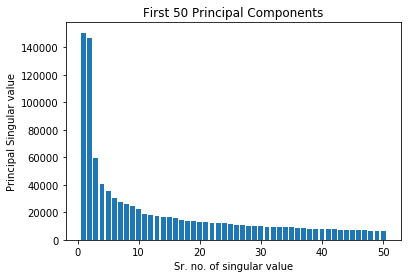

In [3]:
from dataset import A, Z    # Training Set = A, Test Set = Z

W, V, K = principalComponents(A)

plotPrincipalComponents(A, K, 50)

In [4]:
train, test = reduced_train_test_data(A,Z,W,V,K,134)
s = train.groupby(["class"])

In [5]:
import scipy.linalg
import math 
from scipy.linalg import svd
from sklearn.decomposition import PCA


pca = PCA(n_components = 9)

In [6]:
def principalAngles(s):
    x = range(1,10)
    for i in range(10):
        m = s.get_group(i)
        m = m.iloc[:,:-1]
        m = m.T
        m = pca.fit_transform(m)
        M1 = pd.DataFrame(m)
        q1, r1 = LA.qr(m)
        q1 = pd.DataFrame(q1)
        for j in range(10):
            if(j!=i):
                m = s.get_group(j)
                m = m.iloc[:,:-1]
                m = m.T
                m = pca.fit_transform(m)
                M2 = pd.DataFrame(m)
                q2, r2 = LA.qr(m)
                q2 = pd.DataFrame(q2)
                cos2 = pd.DataFrame(np.matmul(np.array(q1.T),np.array(q2)))
                Y, S, Zt = svd(cos2)
                proj_angles = []
                for k in range(len(S)):
                    proj_angles.append(math.degrees(math.acos(S[k])))
                plt.bar(x,proj_angles)
                plt.xlabel("Sr. no. of Principal Angle")
                plt.ylabel("Principal Angle (in degrees)")
                plt.title("for %d %d"%(i,j))
                print("Smallest angle is", proj_angles[0])
                print("Largest angle is", proj_angles[-1])
                plt.show()

Smallest angle is 12.727535211556622
Largest angle is 85.30945360070929


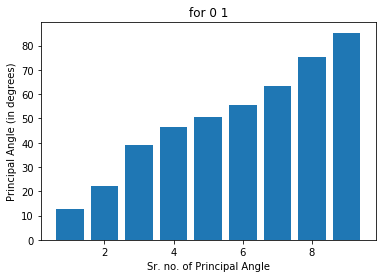

Smallest angle is 10.12683354760795
Largest angle is 72.78520341243917


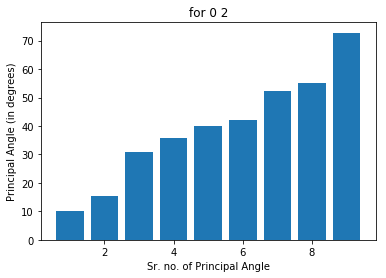

Smallest angle is 10.904010141215618
Largest angle is 80.6877303106256


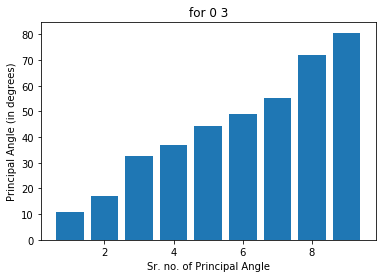

Smallest angle is 12.127899489743154
Largest angle is 81.07652481675362


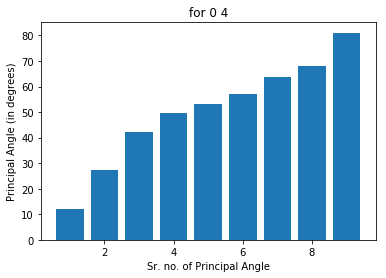

Smallest angle is 13.771843031591995
Largest angle is 89.40011245033445


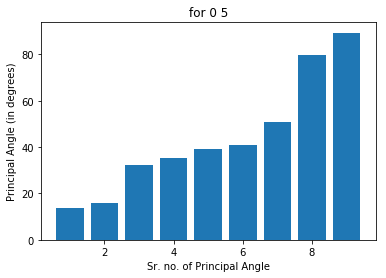

Smallest angle is 10.741873668663661
Largest angle is 81.55704834535148


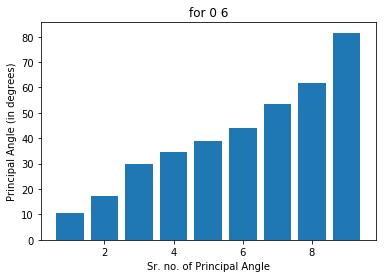

Smallest angle is 11.787757004074596
Largest angle is 82.70391335817972


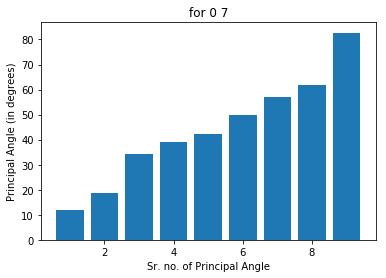

Smallest angle is 15.199279599234382
Largest angle is 81.75892241731555


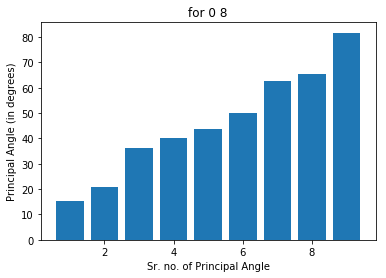

Smallest angle is 11.794631862880365
Largest angle is 84.84602887032818


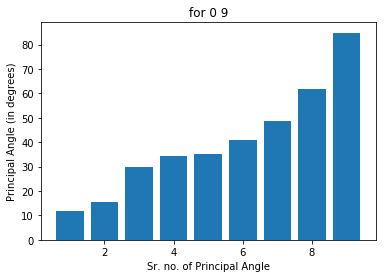

Smallest angle is 12.727535211556537
Largest angle is 85.30945360070929


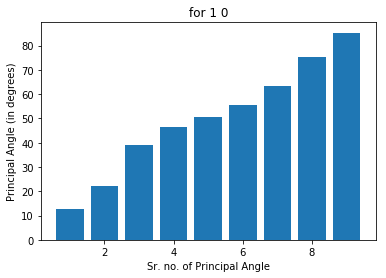

Smallest angle is 11.513395037327278
Largest angle is 87.48456699863884


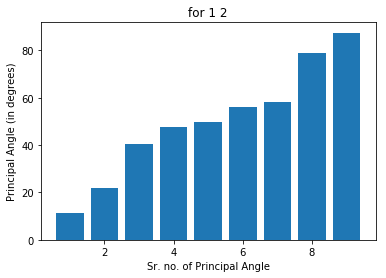

Smallest angle is 12.756551836100277
Largest angle is 85.18842176159855


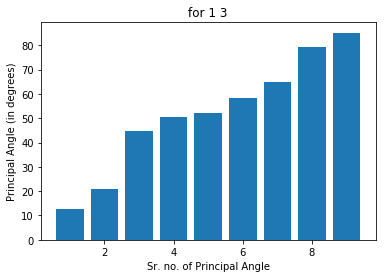

Smallest angle is 12.691955282743482
Largest angle is 88.60163844450993


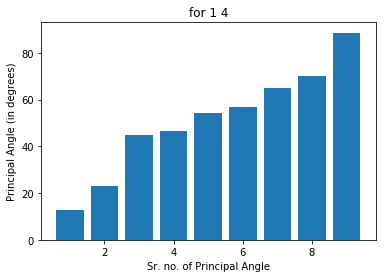

Smallest angle is 13.526378679589026
Largest angle is 88.07991738597725


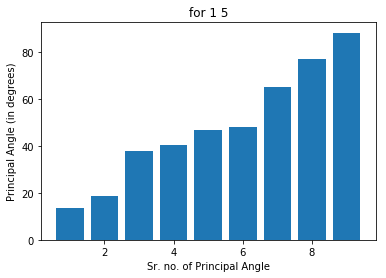

Smallest angle is 13.556436568719121
Largest angle is 86.82772406289493


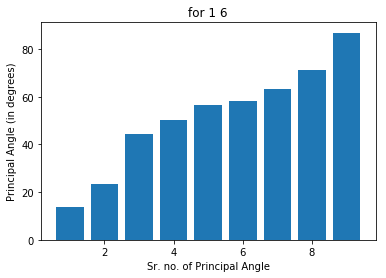

Smallest angle is 11.540523754565353
Largest angle is 85.85318480426251


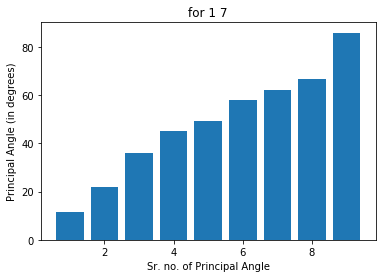

Smallest angle is 15.364715573097406
Largest angle is 88.49225159395657


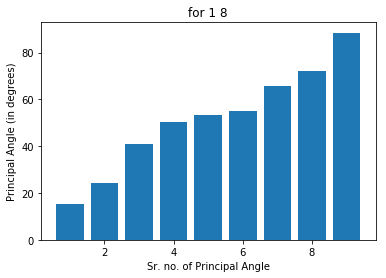

Smallest angle is 14.480032038146344
Largest angle is 88.17724121086479


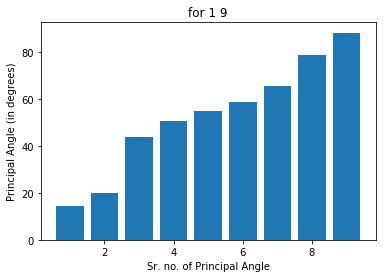

Smallest angle is 10.126833547608202
Largest angle is 72.78520341243915


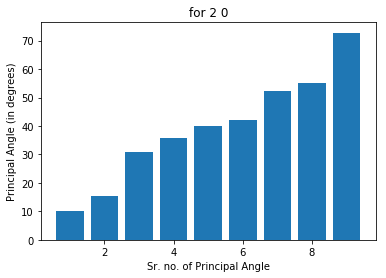

Smallest angle is 11.513395037327436
Largest angle is 87.48456699863884


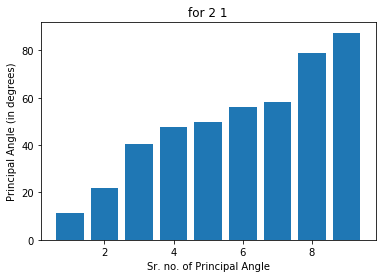

Smallest angle is 11.935586570310358
Largest angle is 85.87335296606945


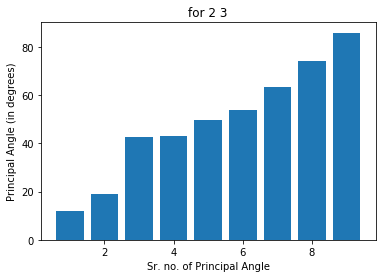

Smallest angle is 11.06049262400547
Largest angle is 88.95896898108398


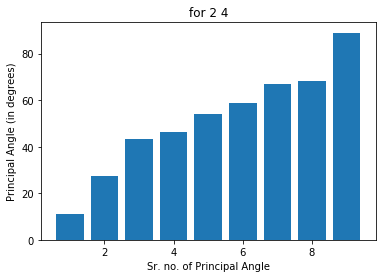

Smallest angle is 13.901493896891091
Largest angle is 81.2329872484643


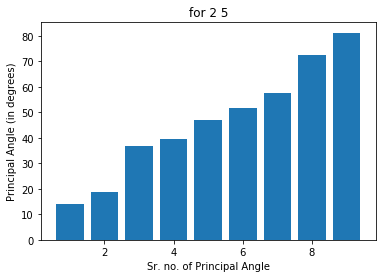

Smallest angle is 11.527487760020565
Largest angle is 86.93764536064867


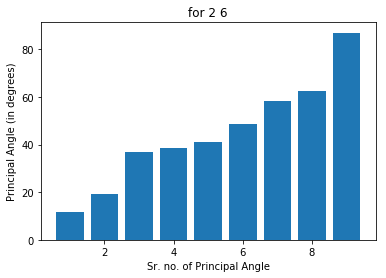

Smallest angle is 11.369273724465929
Largest angle is 89.73996473031572


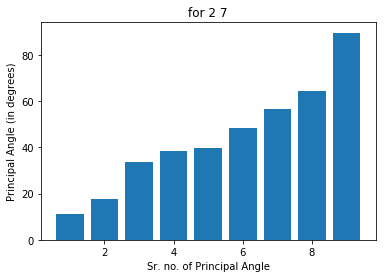

Smallest angle is 15.418702045022084
Largest angle is 79.15530940329639


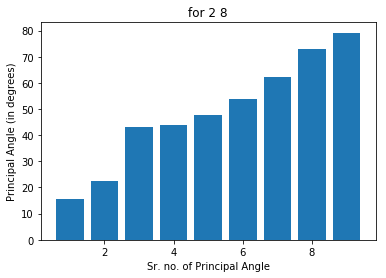

Smallest angle is 10.550556604031472
Largest angle is 89.70552631389008


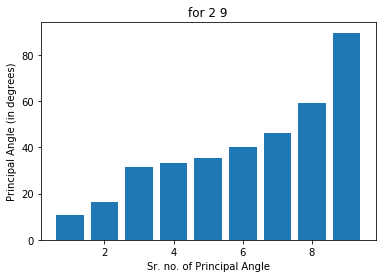

Smallest angle is 10.904010141215416
Largest angle is 80.6877303106256


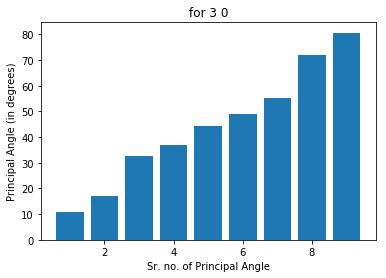

Smallest angle is 12.756551836100451
Largest angle is 85.18842176159855


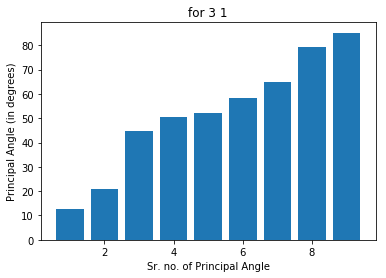

Smallest angle is 11.935586570310234
Largest angle is 85.87335296606946


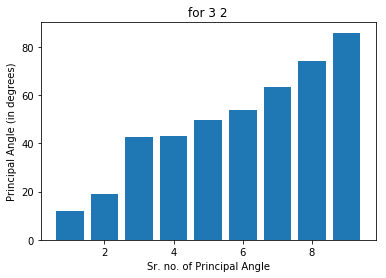

Smallest angle is 12.73626823209989
Largest angle is 83.35037735696406


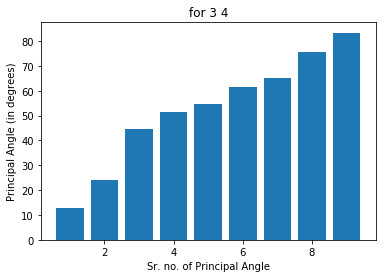

Smallest angle is 14.73675562078028
Largest angle is 78.23520016507264


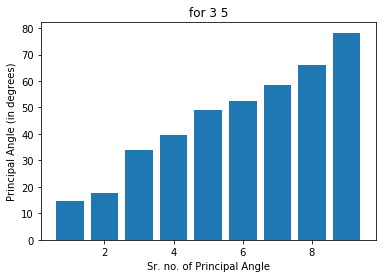

Smallest angle is 10.917504544156426
Largest angle is 66.02016022581067


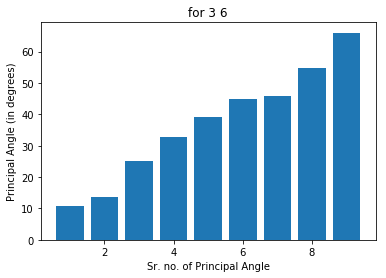

Smallest angle is 13.1761079719212
Largest angle is 87.01945406461786


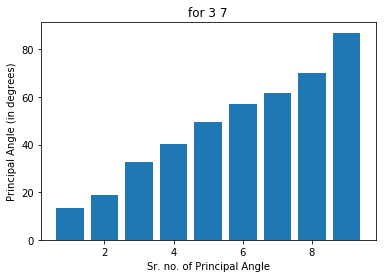

Smallest angle is 16.481525885368598
Largest angle is 88.4375536376798


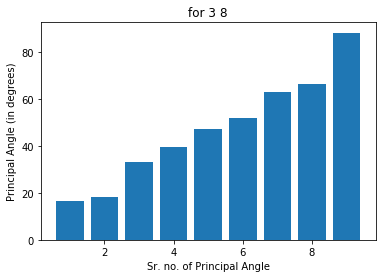

Smallest angle is 12.911212982998986
Largest angle is 81.24222811184707


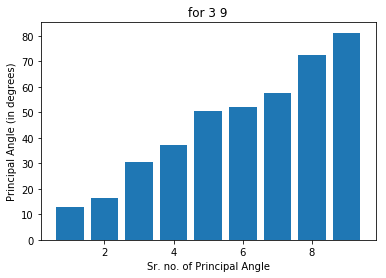

Smallest angle is 12.127899489742882
Largest angle is 81.07652481675362


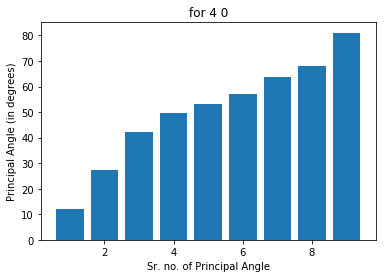

Smallest angle is 12.691955282743482
Largest angle is 88.60163844450993


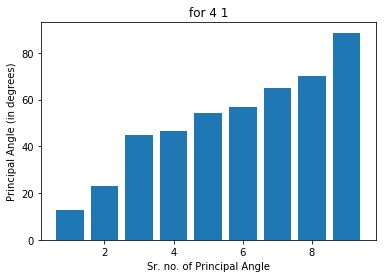

Smallest angle is 11.060492624005702
Largest angle is 88.95896898108398


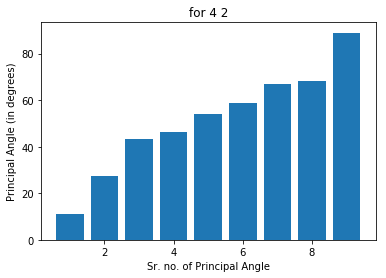

Smallest angle is 12.73626823210012
Largest angle is 83.35037735696406


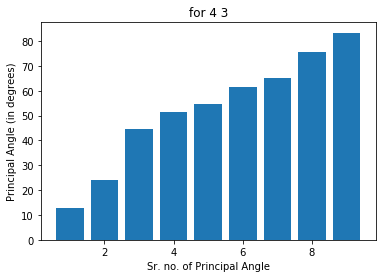

Smallest angle is 15.784258254982008
Largest angle is 89.67070413770269


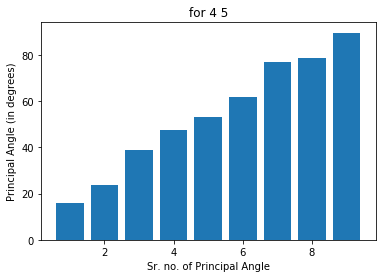

Smallest angle is 11.506891460958766
Largest angle is 88.0211405796106


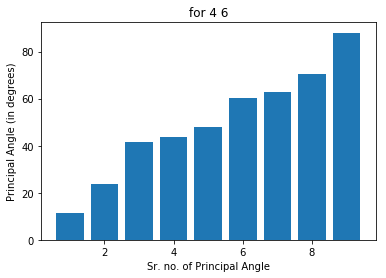

Smallest angle is 12.859649113293615
Largest angle is 89.04626661365033


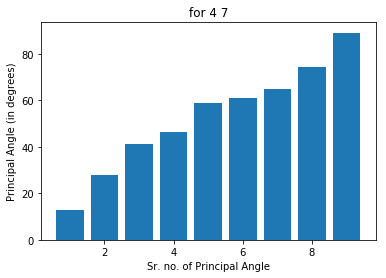

Smallest angle is 13.363232800624155
Largest angle is 87.99874853747241


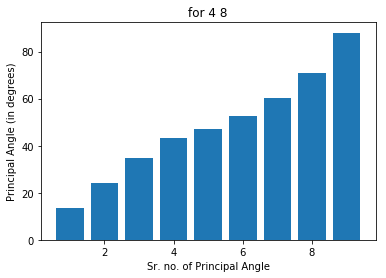

Smallest angle is 15.113073504172815
Largest angle is 83.82675751436419


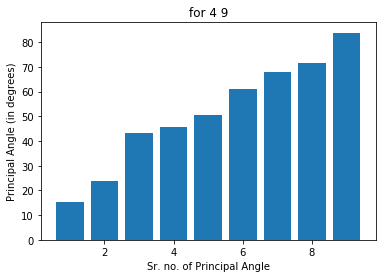

Smallest angle is 13.77184303159213
Largest angle is 89.40011245033445


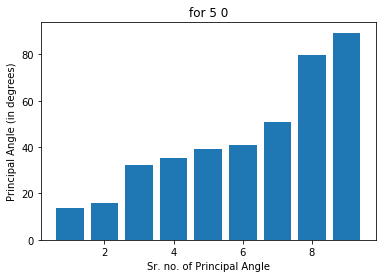

Smallest angle is 13.526378679589081
Largest angle is 88.07991738597724


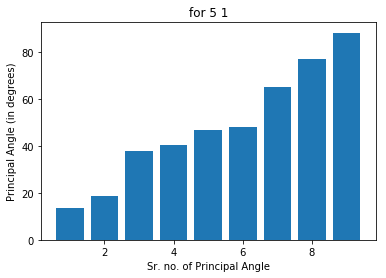

Smallest angle is 13.90149389689117
Largest angle is 81.23298724846431


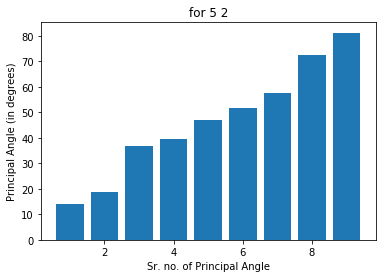

Smallest angle is 14.736755620780029
Largest angle is 78.23520016507263


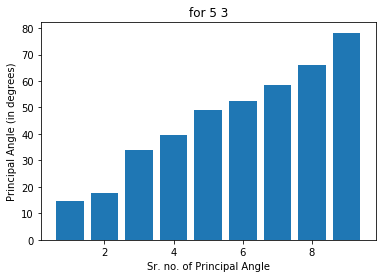

Smallest angle is 15.784258254981939
Largest angle is 89.67070413770269


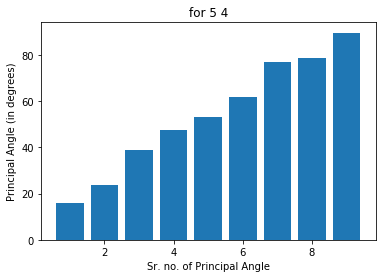

Smallest angle is 14.15418426168825
Largest angle is 84.26910260018508


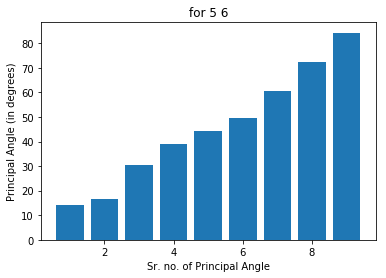

Smallest angle is 14.55736755254571
Largest angle is 89.86961391140471


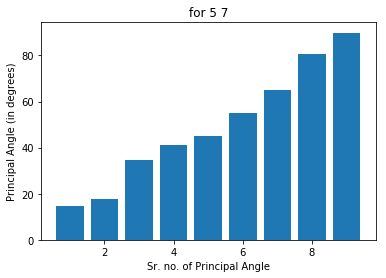

Smallest angle is 15.474284950411391
Largest angle is 86.69637173030681


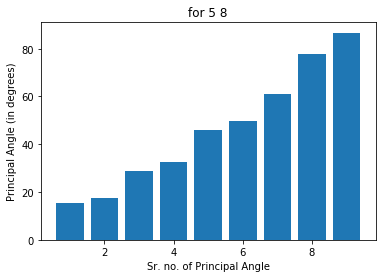

Smallest angle is 11.67422953126338
Largest angle is 85.88571478047172


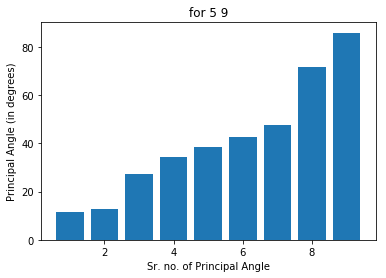

Smallest angle is 10.741873668663082
Largest angle is 81.55704834535148


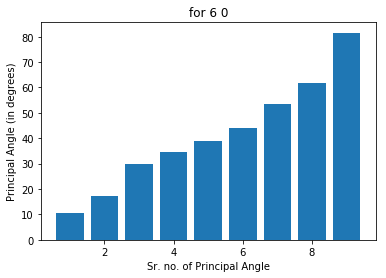

Smallest angle is 13.556436568718931
Largest angle is 86.82772406289493


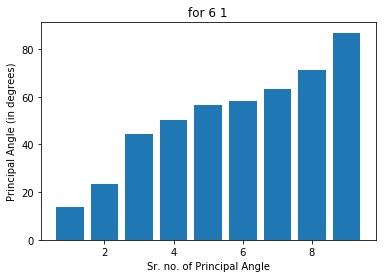

Smallest angle is 11.527487760020978
Largest angle is 86.93764536064867


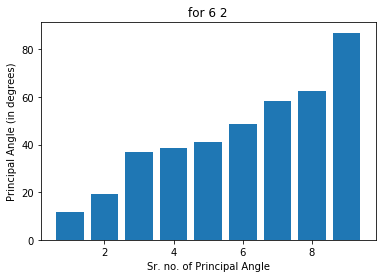

Smallest angle is 10.917504544156191
Largest angle is 66.02016022581064


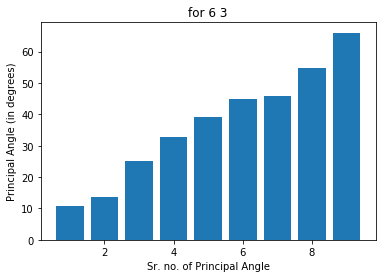

Smallest angle is 11.506891460958608
Largest angle is 88.0211405796106


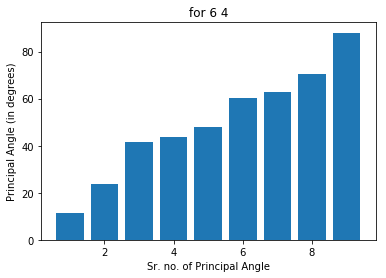

Smallest angle is 14.15418426168825
Largest angle is 84.26910260018508


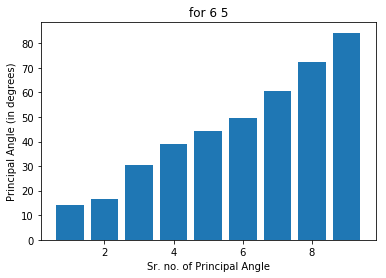

Smallest angle is 12.888967922182742
Largest angle is 87.75367359723076


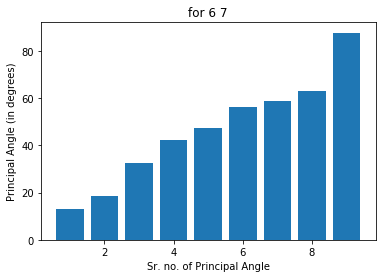

Smallest angle is 12.893217482037253
Largest angle is 87.99929750163614


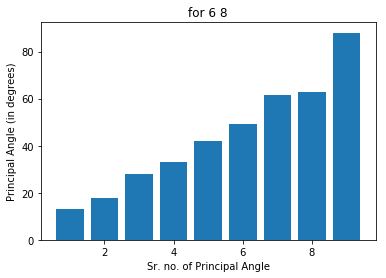

Smallest angle is 11.942656242261508
Largest angle is 89.45156830996646


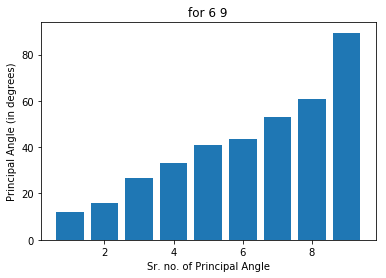

Smallest angle is 11.787757004074596
Largest angle is 82.70391335817973


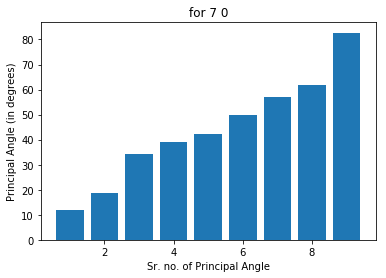

Smallest angle is 11.540523754565575
Largest angle is 85.85318480426251


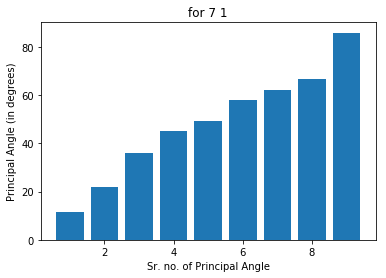

Smallest angle is 11.369273724465833
Largest angle is 89.73996473031572


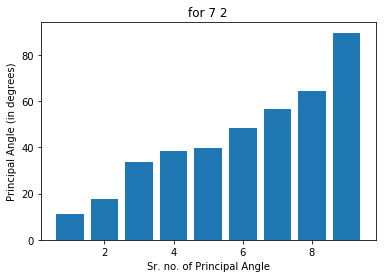

Smallest angle is 13.176107971921255
Largest angle is 87.01945406461786


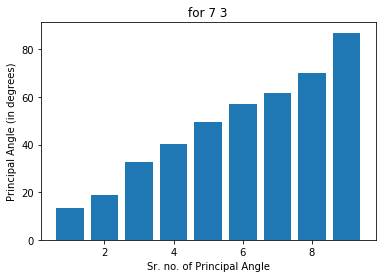

Smallest angle is 12.859649113293644
Largest angle is 89.04626661365033


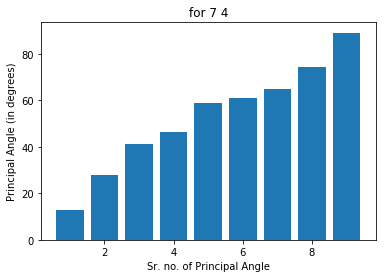

Smallest angle is 14.557367552545838
Largest angle is 89.86961391140471


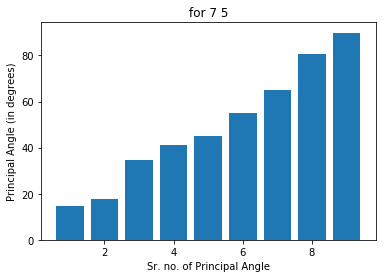

Smallest angle is 12.888967922182543
Largest angle is 87.75367359723074


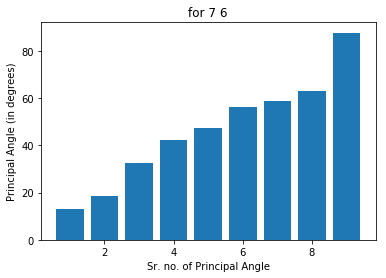

Smallest angle is 13.212260233556453
Largest angle is 80.87970641527481


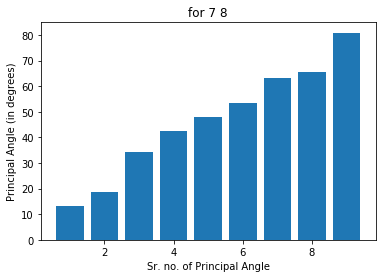

Smallest angle is 12.797474878557749
Largest angle is 75.19547694275411


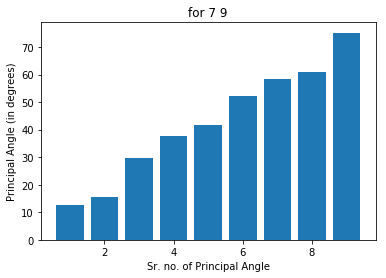

Smallest angle is 15.199279599234282
Largest angle is 81.75892241731556


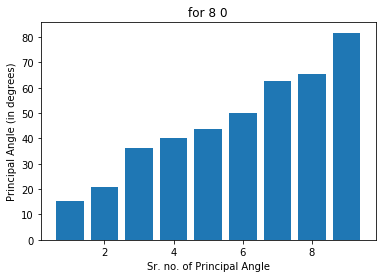

Smallest angle is 15.364715573097428
Largest angle is 88.49225159395657


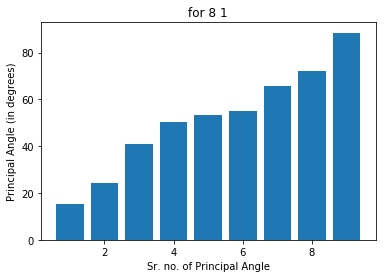

Smallest angle is 15.418702045022084
Largest angle is 79.15530940329636


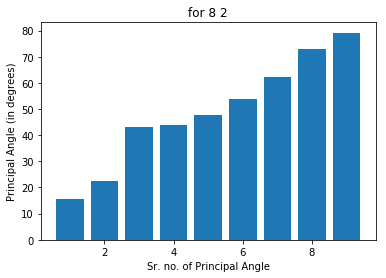

Smallest angle is 16.481525885368708
Largest angle is 88.4375536376798


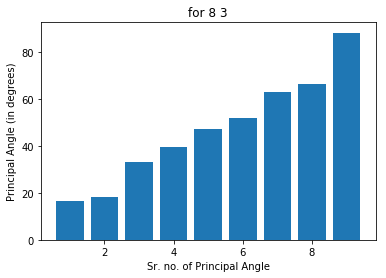

Smallest angle is 13.363232800624349
Largest angle is 87.99874853747241


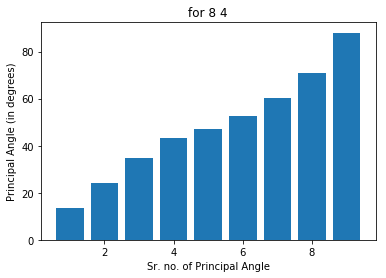

Smallest angle is 15.474284950411464
Largest angle is 86.6963717303068


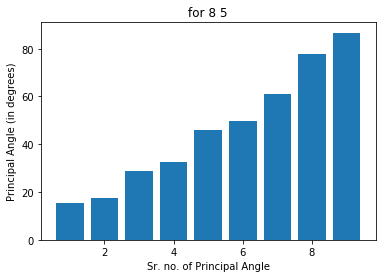

Smallest angle is 12.893217482037509
Largest angle is 87.99929750163614


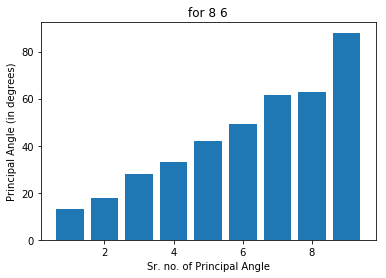

Smallest angle is 13.212260233556508
Largest angle is 80.87970641527481


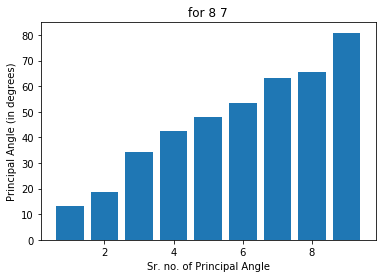

Smallest angle is 14.82754190189774
Largest angle is 81.21308708847363


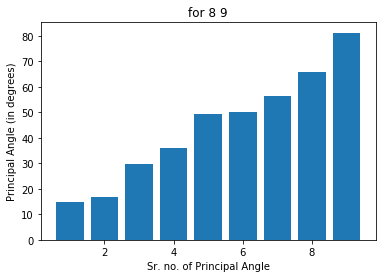

Smallest angle is 11.794631862880335
Largest angle is 84.84602887032818


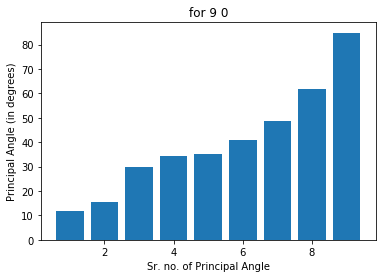

Smallest angle is 14.480032038146598
Largest angle is 88.17724121086479


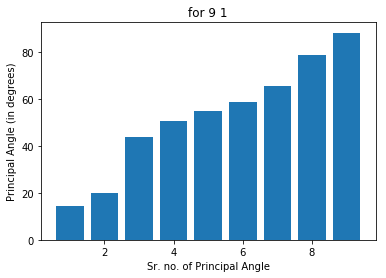

Smallest angle is 10.550556604031541
Largest angle is 89.70552631389008


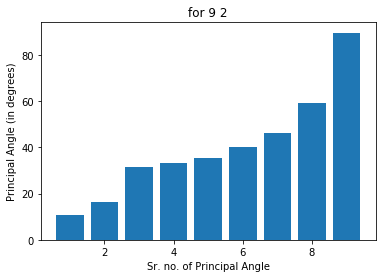

Smallest angle is 12.911212982998958
Largest angle is 81.24222811184707


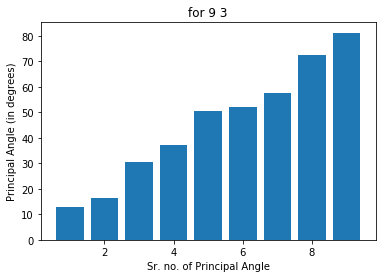

Smallest angle is 15.113073504172842
Largest angle is 83.82675751436419


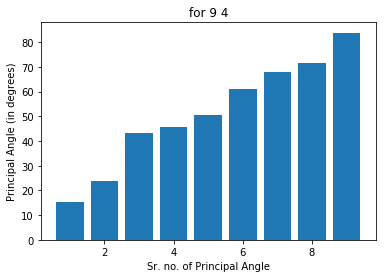

Smallest angle is 11.67422953126338
Largest angle is 85.88571478047172


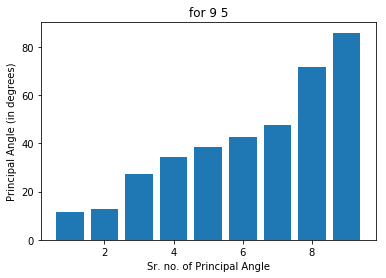

Smallest angle is 11.942656242261478
Largest angle is 89.45156830996648


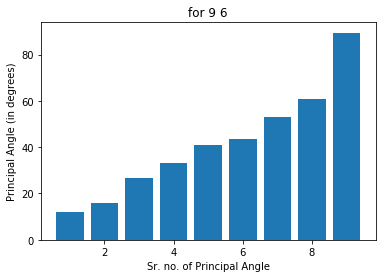

Smallest angle is 12.797474878557692
Largest angle is 75.1954769427541


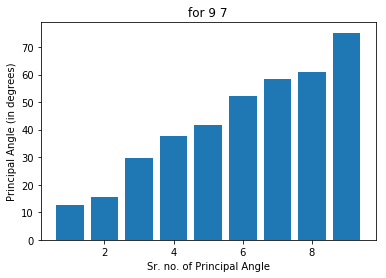

Smallest angle is 14.82754190189774
Largest angle is 81.21308708847361


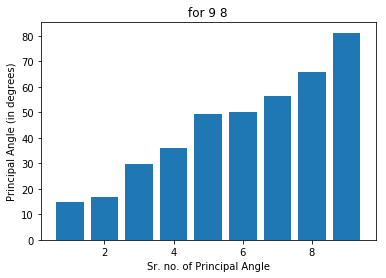

In [7]:
principalAngles(s)